In [1]:
%autosave 300

Autosaving every 300 seconds


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet

from generic.load_data import load_data

from jupyterthemes import jtplot

jtplot.style()

In [58]:
df = load_data('TSA_Enplanements')

print(df.shape)
df.tail(2)

(1941, 6)


,date,two_day,one_day,day_of,evening,actual
1939,2020-04-22,780.0,786.0,939.0,NaN,NaN
1940,2020-04-21,799.0,851.0,1015.0,1131.0,1117.0


In [59]:
df = df[['date', 'actual']]
df.columns = ['ds', 'y']

df.ds = pd.to_datetime(df.ds, infer_datetime_format=True)
df.sort_values('ds', inplace=True)

df.dropna(inplace=True)

df.y = df.y.interpolate(on='ds')

df.reset_index(drop=True, inplace=True)

df = df[df.ds >= '2020-04-01']

<Figure size 432x288 with 0 Axes>

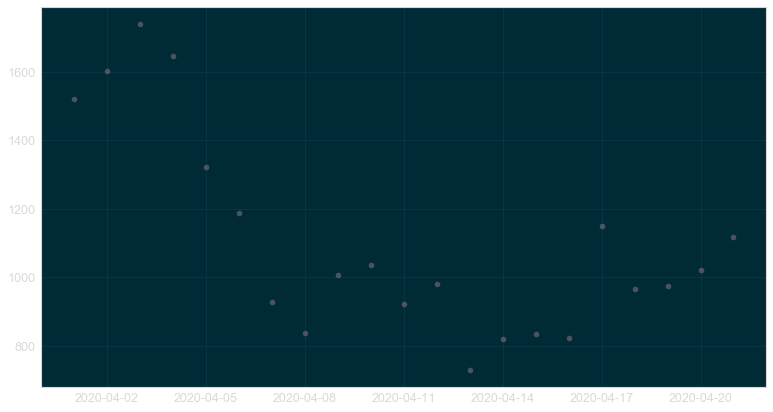

In [60]:
plt.clf()
plt.figure(figsize=(13, 7))

plt.plot_date(df.ds.values, df.y.values, c='#987987', alpha=.5)

plt.show()

In [61]:
df_train = df.iloc[:len(df) - 7].copy()
df_test = df.iloc[len(df) - 7:].copy()

<Figure size 432x288 with 0 Axes>

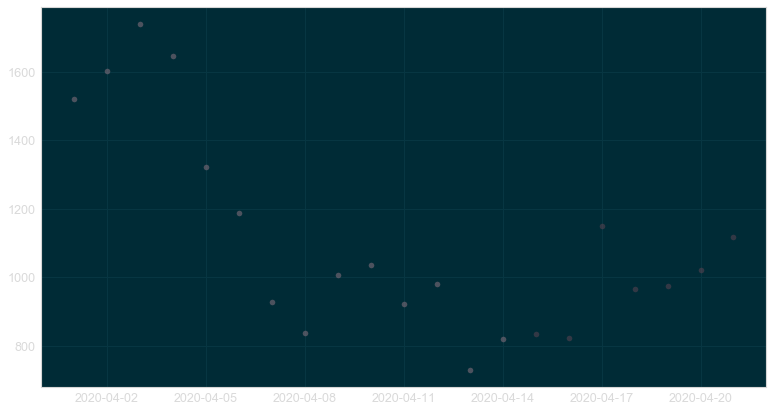

In [62]:
plt.clf()
plt.figure(figsize=(13, 7))

plt.plot_date(df_train.ds.values, df_train.y.values, c='#987987', alpha=.5)
plt.plot_date(df_test.ds.values, df_test.y.values, c='#654654', alpha=.5)

plt.show()

In [63]:
m = Prophet()

m.add_country_holidays('US')

m.fit(df_train)

future = m.make_future_dataframe(periods=7)

forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 10.
C:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [64]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-01,1628.688874,1426.719460,1834.050858,1628.688874,1628.688874,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1628.688874
1,2020-04-02,1557.000094,1353.140010,1746.739075,1557.000094,1557.000094,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557.000094
2,2020-04-03,1485.311314,1280.958189,1656.635454,1485.311314,1485.311314,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1485.311314
3,2020-04-04,1413.622533,1219.283961,1618.139780,1413.622533,1413.622533,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1413.622533
4,2020-04-05,1341.933753,1143.869289,1533.349276,1341.933753,1341.933753,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1341.933753


<Figure size 432x288 with 0 Axes>

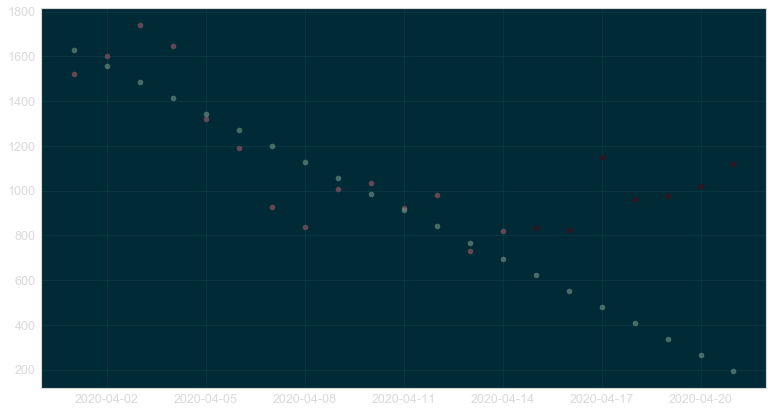

In [65]:
plt.clf()
plt.figure(figsize=(13, 7))

plt.plot_date(df_train.ds.values, df_train.y.values, c='#654654', alpha=1)
plt.plot_date(df_test.ds.values, df_test.y.values, c='#321321', alpha=1)
plt.plot_date(forecast.ds.values, forecast.yhat.values, c='#789789', alpha=.6)

plt.show()

In [66]:
dd = df.merge(forecast[['ds', 'yhat']])

print(dd.shape)
dd.tail()

(21, 3)


,ds,y,yhat
16,2020-04-17,1150.0,481.681766
17,2020-04-18,964.0,409.994472
18,2020-04-19,974.0,338.307178
19,2020-04-20,1022.0,266.619884
20,2020-04-21,1117.0,194.932590


In [178]:
def give_lvl(x):
    if x < 47000:
        return 1
    elif x < 50000:
        return 2
    elif x < 53000:
        return 3
    else:
        return 4

In [179]:
dd['lvl_0'] = dd.y.apply(give_lvl)
dd['lvl_1'] = dd.yhat.apply(give_lvl)

In [180]:
dd = dd.merge(d)

In [181]:
dd.tail(7)

,ds,y,yhat,lvl_0,lvl_1,level
638,2019-10-01,36358.0,45260.083298,1,1,1.0
639,2019-10-02,39024.0,46862.863928,1,1,1.0
640,2019-10-03,39024.0,51370.879044,1,3,2.0
641,2019-10-04,50662.0,52566.247018,3,3,3.0
642,2019-10-05,28550.0,35382.790096,1,1,1.0
643,2019-10-06,47323.0,47425.072424,2,2,1.0
644,2019-10-07,48161.0,50419.356887,2,3,2.0


<Figure size 460.8x403.2 with 0 Axes>

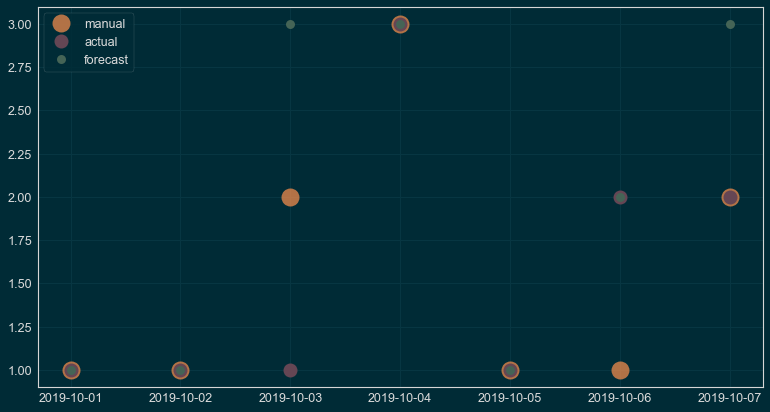

In [190]:
plt.clf()
plt.figure(figsize=(13, 7))

plt.plot_date(dd.tail(7).ds.values, dd.tail(7).level.values, c='y', alpha=.7, markersize=18, 
              label='manual')

plt.plot_date(dd.tail(7).ds.values, dd.tail(7).lvl_0.values, c='#654654', alpha=1, markersize=14, 
              label='actual')
plt.plot_date(dd.tail(7).ds.values, dd.tail(7).lvl_1.values, c='#456456', alpha=1, markersize=9, 
              label='forecast')

plt.legend()
plt.show()

In [166]:
def mape_vectorized_v2(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()

In [168]:
mape_vectorized_v2(df_test.y.values, forecast[forecast.ds >= '2020-04-06'].yhat.values)

35.84325242217924